   ## KNN ALGORITHM 
   
*KNN(K-Nearest) Algorithm is type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well:*

**1.Lazy learning algorithm** − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

**2.Non-parametric learning algorithm** − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

### HOW DOES KNN ALGORITHM WORK?

**KNN algorithm** *uses **‘feature similarity’** to predict the values of new datapoints meaning that the new data point will be assigned a value based on how closely it matches the points in the training set. We can understand its working with the help of following steps:*

Step 1 − For implementing any algorithm, we need dataset. So during the first step of KNN, we must load the training as well as test data.

Step 2 − Next, we need to choose the value of K i.e. the nearest data points. K can be any integer.

Step 3 − For each point in the test data do the following:

*1. Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.*

*2. Now, based on the distance value, sort them in ascending order.*

*3. Next, it will choose the top K rows from the sorted array.*

*4. Now, it will assign a class to the test point based on most frequent class of these rows.*

### The diagram below also gives an overview of the KNN algorithm.
![KNN Algorithm](knn2.jpg)

In [3]:
#loading packages needed
using CSV
using DataFrames
using Plots 

In [5]:
penguins = CSV.read("penguins_size.csv", DataFrame)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
,String,String,Float64,Float64,Int64,Int64
1,Adelie,Torgersen,39.1,18.7,181,3750
2,Adelie,Torgersen,39.5,17.4,186,3800
3,Adelie,Torgersen,40.3,18.0,195,3250
4,Adelie,Torgersen,36.7,19.3,193,3450
5,Adelie,Torgersen,39.3,20.6,190,3650
6,Adelie,Torgersen,38.9,17.8,181,3625
7,Adelie,Torgersen,39.2,19.6,195,4675
8,Adelie,Torgersen,34.1,18.1,193,3475
9,Adelie,Torgersen,42.0,20.2,190,4250


In [6]:
x_data = [x for x in zip(penguins.culmen_length_mm, penguins.culmen_depth_mm)]  #feature set
y_data = [penguins.species[i] for i = 1:342];   #label set

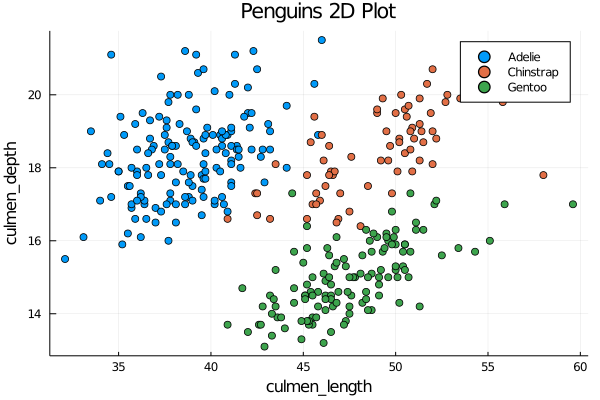

In [7]:
scatter(xaxis = "culmen_length",
        yaxis = "culmen_depth",
        title = "Penguins 2D Plot")

scatter!(x_data[1:151],
         label = "Adelie")

scatter!(x_data[152:219],
         label = "Chinstrap")

scatter!(x_data[220:342],
         label = "Gentoo")


In [8]:
function distance(p1,p2)
    return sqrt(sum((p1[i] - p2[i])^2 for i = 1:length(p1)))
end

distance (generic function with 1 method)

In [9]:
test_array = [(distance(x_data[1], x_data[i]), y_data[i]) for i = 1:length(x_data)]

342-element Array{Tuple{Float64,String},1}:
 (0.0, "Adelie")
 (1.3601470508735447, "Adelie")
 (1.3892443989449763, "Adelie")
 (2.4738633753705956, "Adelie")
 (1.9104973174542816, "Adelie")
 (0.921954445729288, "Adelie")
 (0.905538513813744, "Adelie")
 (5.035871324805668, "Adelie")
 (3.2649655434629, "Adelie")
 (2.061552812808831, "Adelie")
 (1.9104973174542819, "Adelie")
 (2.2825424421026645, "Adelie")
 (2.5495097567963922, "Adelie")
 ⋮
 (11.060289327137871, "Gentoo")
 (5.622277118748238, "Gentoo")
 (12.630122723077553, "Gentoo")
 (8.459905436823748, "Gentoo")
 (16.22621335986927, "Gentoo")
 (6.177378084592199, "Gentoo")
 (10.016985574512919, "Gentoo")
 (9.518928511129813, "Gentoo")
 (8.8684835231284, "Gentoo")
 (11.691449867317566, "Gentoo")
 (7.240165743959181, "Gentoo")
 (11.108555261599049, "Gentoo")

In [10]:
function KNN(p, features, labels, k)
    distance_array = [(distance(p, features[i]), labels[i]) for i = 1:length(features)]
    sort!(distance_array, by = x -> x[1])
    
    return distance_array[1:k]
end


KNN (generic function with 1 method)

In [11]:
KNN(x_data[50], x_data, y_data, 7)

7-element Array{Tuple{Float64,String},1}:
 (0.0, "Adelie")
 (0.10000000000000142, "Adelie")
 (0.14142135623731153, "Adelie")
 (0.22360679774997896, "Adelie")
 (0.31622776601683905, "Adelie")
 (0.40000000000000213, "Adelie")
 (0.5, "Adelie")

In [12]:
function KNN_penguins_predictor(p, features, labels, k)
    neighbors = KNN(p, features, labels, k)
    Adelie_count = [1.0 for x in neighbors if x[2] == "Adelie"]
    Chinstrap_count = [1.0 for x in neighbors if x[2] == "Chinstrap"]
    Gentoo_count = [1.0 for x in neighbors if x[2] == "Gentoo"]
    
    temp_list = [("Adelie", Adelie_count), ("Chinstrap", Chinstrap_count), ("Gentoo", Gentoo_count)]
    sort!(temp_list, by = x -> x[2])
    
    return temp_list[end][1]
end

KNN_penguins_predictor (generic function with 1 method)

In [14]:
KNN_penguins_predictor(x_data[154], x_data, y_data, 5)

"Chinstrap"